# Clean data

## Khai báo thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import re

In [ ]:
# 1. Đọc dữ liệu
file_path = "dataset.csv" 

try:
    df = pd.read_csv(file_path)
    print("Dữ liệu ban đầu:")
    print(df.head())
except FileNotFoundError:
    print("Không tìm thấy file!")
    exit()

# 2. Kiểm tra dữ liệu thiếu
def check_missing_values(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    print("\nSố lượng giá trị thiếu:")
    print(missing)

check_missing_values(df)

# 3. Xử lý dữ liệu thiếu
imputer_age = SimpleImputer(strategy='median')
df['Age'] = imputer_age.fit_transform(df[['Age']])
df['Purchase_Amount'].fillna(df['Purchase_Amount'].median(), inplace=True)
df['Last_Purchase_Date'].fillna(df['Last_Purchase_Date'].mode()[0], inplace=True)
df.dropna(subset=['Name'], inplace=True)

# 4. Chuẩn hóa email
def clean_email(email):
    if not isinstance(email, str) or '@' not in email or '.' not in email.split('@')[-1]:
        return np.nan
    return email.lower().strip()

df['Email'] = df['Email'].apply(clean_email)
df.dropna(subset=['Email'], inplace=True)  # Xóa email không hợp lệ

# 5. Loại bỏ dòng trùng lặp
df.drop_duplicates(inplace=True)

# 6. Chuyển đổi ngày tháng
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'], errors='coerce')

# 7. Lưu tập dữ liệu đã làm sạch
df.to_csv("cleaned_dataset.csv", index=False)
print("Dữ liệu sau khi làm sạch đã được lưu vào cleaned_dataset.csv")

Dữ liệu ban đầu:
   Customer_ID     Name   Age  Gender                  Email  Purchase_Amount  \
0         7402     Jane  44.0  Female       jane7401@example           138.31   
1         5835    Chris  42.0  Female  chris5834@example.net           234.88   
2         2123  Michael  44.0    Male    michael2122@example           325.83   
3         8789      Bob  55.0  Female    bob8788@example.com           155.60   
4          305    Alice  38.0    Male   alice304@example.com            96.52   

  Last_Purchase_Date  
0         2024-03-01  
1         2024-03-01  
2         2024-02-20  
3                NaN  
4         2024-02-20  

Số lượng giá trị thiếu:
Age                    502
Purchase_Amount          1
Last_Purchase_Date    1068
dtype: int64
Dữ liệu sau khi làm sạch đã được lưu vào cleaned_dataset.csv


C:\Users\HUY\AppData\Local\Temp\ipykernel_10992\4148367049.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Purchase_Amount'].fillna(df['Purchase_Amount'].median(), inplace=True)
C:\Users\HUY\AppData\Local\Temp\ipykernel_10992\4148367049.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

# EDA

Customer_ID                    int64
Name                          object
Age                          float64
Gender                        object
Email                         object
Purchase_Amount              float64
Last_Purchase_Date    datetime64[ns]
dtype: object

Thống kê dữ liệu:
        Customer_ID          Age  Purchase_Amount  \
count   6777.000000  6777.000000      6777.000000   
mean    4999.822783    43.220747       254.112066   
min        3.000000    18.000000        10.050000   
25%     2534.000000    31.000000       128.690000   
50%     4975.000000    43.000000       252.330000   
75%     7505.000000    56.000000       374.230000   
max    10000.000000    69.000000       499.900000   
std     2876.835759    14.641847       141.051513   

                  Last_Purchase_Date  
count                           6777  
mean   2024-02-14 16:51:50.756972288  
min              2024-01-15 00:00:00  
25%              2024-02-10 00:00:00  
50%              2024-02-20 00:00:0

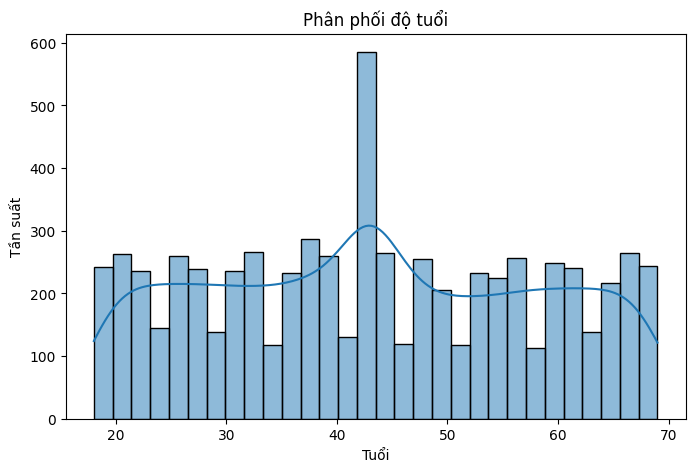

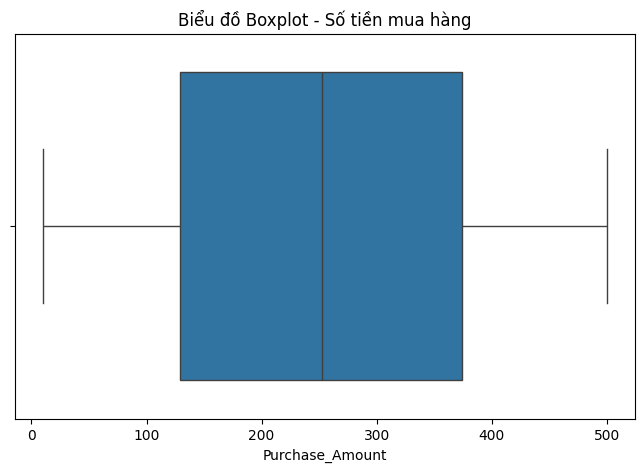

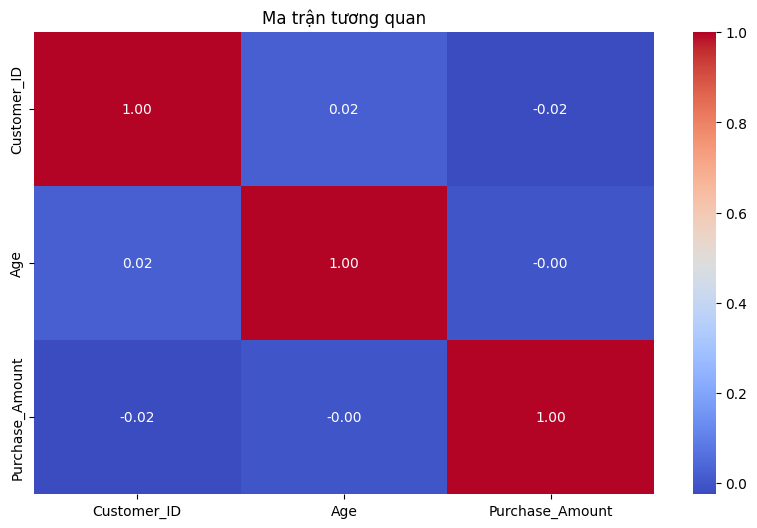

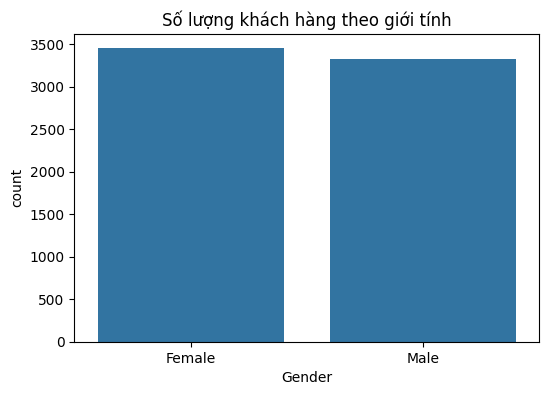

In [3]:
# Chuyển đổi dữ liệu về đúng kiểu số
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Chuyển đổi Age sang số, nếu lỗi thì thành NaN
df['Purchase_Amount'] = pd.to_numeric(df['Purchase_Amount'], errors='coerce')  # Chuyển Purchase_Amount sang số

# Kiểm tra lại kiểu dữ liệu
print(df.dtypes)

print("\nThống kê dữ liệu:")
print(df.describe())

# 1. Biểu đồ phân phối độ tuổi
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Phân phối độ tuổi")
plt.xlabel("Tuổi")
plt.ylabel("Tần suất")
plt.show()

# 2. Biểu đồ phân bố số tiền mua hàng
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Purchase_Amount'])
plt.title("Biểu đồ Boxplot - Số tiền mua hàng")
plt.show()

# Chỉ chọn các cột số để tính ma trận tương quan
numeric_df = df.select_dtypes(include=[np.number])  # Chọn các cột có kiểu số

# 3. Ma trận tương quan
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan")
plt.show()


# 4. Biểu đồ số lượng khách hàng theo giới tính
plt.figure(figsize=(6,4))
sns.countplot(x=df['Gender'])
plt.title("Số lượng khách hàng theo giới tính")
plt.show()
